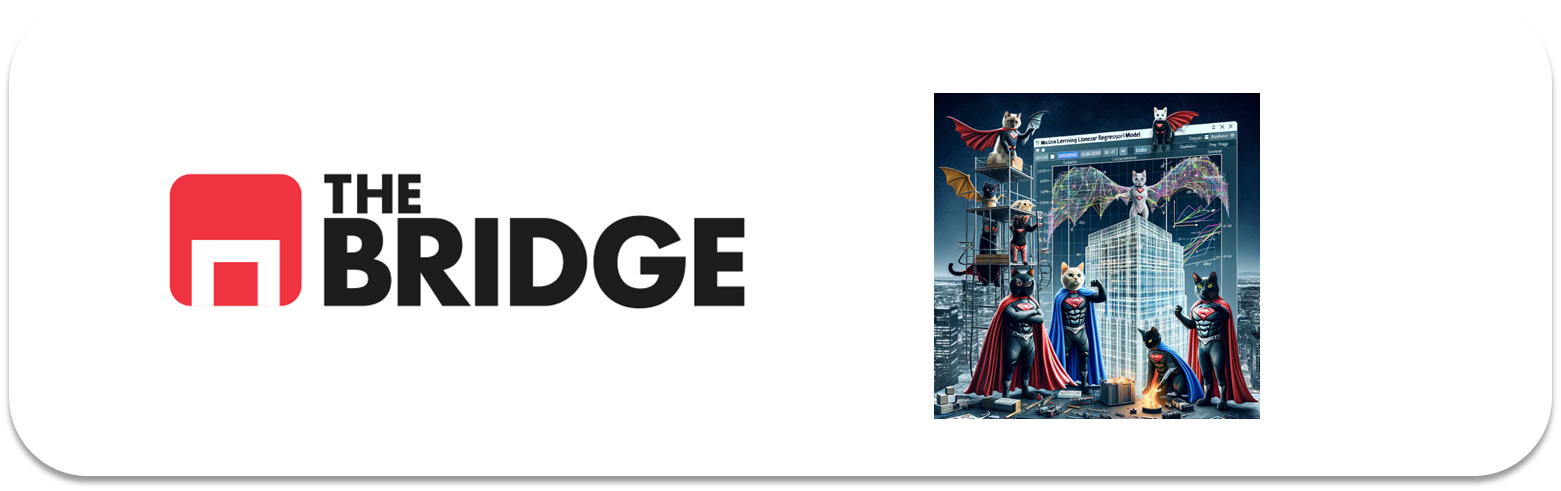

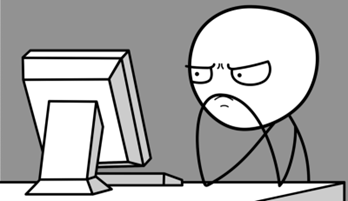

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logística para clasificación binaria**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios).

### Inicio: Entendiendo el problema

En este caso el objetivo de los ejercicios es hacer un modelado de regresión logística sobre el dataset conocidos como "Adults" o "Census Income" que permita casificar a las personas en si ganan más de 50K dolalres o no, en función de una serie de características demográficas y de empleo. Sigue las instrucciones cuando sea necesario para poder continuar

El nombre de las columnas y sus valores se muestra a continuación (las columnas siguen el mismo orden que en el fichero, por si tuvieras que utilizar estos nombres)

age: edad, continuous.  

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  

fnlwgt: continuous (a eliminar)  

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  

education-num: continuous.  

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  

sex: Female, Male.  

capital-gain: continuous.  

capital-loss: continuous.  

hours-per-week: continuous.  

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.  


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, confusion_matrix

### Ejercicio 1: Carga de datos y vistazo


Carga el conjunto de datos de TRAIN ("./data/adult.data") en un dataframe (tendrás que explorar el tipo de archivo y darle nombre a las columnas). Muestra la descripción de los datos y las primeras filas del conjunto de datos.

*Cargamos los datos, que es un poco tricky*

In [ ]:
ruta = r"C:\Users\Asus Vivobook\Downloads\adult.data"

In [ ]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income']

In [ ]:
adult_df = pd.read_csv(
    ruta,
    header=None,             
    names=column_names,       
    sep=",",                 
    skipinitialspace=True,    
    na_values=["?", " ?"])

In [ ]:

print(adult_df.shape)
adult_df.head(10)


(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


*Hacemos el info y el head*

In [7]:
# Si ya tienes adult_df cargado:
adult_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Ejercicio 2: Preparación y limpieza de Datos (I)

En una situación normal tendríamos que revisar el dataset para ver qué podemos limpiar (convertir tipos, cambiar valores raros, etc) y sólo no deberíamos imputar faltantes sobre el dataset global. Aquí te dirigiré los pasos:

1. Quita los espacios iniciales y finales de todos los valores string del dataset.
2. Comprueba que 'workclass', 'occupation', 'native_country' contienen un valor "raro", que indica los faltantes (este es un ejemplo de dataset con "missing" que no están marcados por np.NaN)
3. Deshazte de las columna "fnlwgt" que ni se entiende, ni se necesita y deshazte de las filas con esos faltantes (tenemos muchos datos y poco "tiempo").

In [ ]:
print("Tamaño inicial:", adult_df.shape)

In [ ]:
for col in adult_df.select_dtypes(include="object").columns:
    adult_df[col] = adult_df[col].astype(str).str.strip()

cols_raras = ["workclass", "occupation", "native_country"]
print("\nComprobación de valores '?' por columna:")
for c in cols_raras:
    if c not in adult_df.columns:
        raise ValueError(f"Falta la columna {c} en el DataFrame.")
    n_q = (adult_df[c] == "?").sum()
    print(f"  - {c}: {n_q} filas con '?' (de {len(adult_df)})")

In [ ]:
if "fnlwgt" in adult_df.columns:
    adult_df.drop(columns=["fnlwgt"], inplace=True)


mascara_faltantes = (adult_df[cols_raras] == "?").any(axis=1)
n_filas_drop = mascara_faltantes.sum()
adult_df_limpio = adult_df.loc[~mascara_faltantes].reset_index(drop=True)

print(f"\nFilas eliminadas por '?' en {cols_raras}: {n_filas_drop}")
print("Tamaño final:", adult_df_limpio.shape)

adult_df.info()
adult_df.head()

Tamaño inicial: (32561, 15)

Comprobación de valores '?' por columna:
  - workclass: 0 filas con '?' (de 32561)
  - occupation: 0 filas con '?' (de 32561)
  - native_country: 0 filas con '?' (de 32561)

Filas eliminadas por '?' en ['workclass', 'occupation', 'native_country']: 0
Tamaño final: (32561, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_pe

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


*1*

*Va siendo hora de desempolvar nuestros conocimientos de pandas y aplicar los métodos de string de pandas, otra vez, que ya lo hicimos en varios ejercicios*  
*IMPORTANTE: Mientras no analicemos valores, ni los cambiemos por valores que salgan de agregar otros o en función de agregaciones de otros, podemos manipular el dataset original. PERO además en este caso podríamos hacer cualquier cosa porque es el dataset de TRAIN, tal y como lo especifíca en el enunciado del ejercicio 1*

In [9]:
import pandas as pd
import re

# asumimos que adult_df ya está cargado

print("Tamaño inicial:", adult_df.shape)

# 1) Localizar columnas de texto
obj_cols = adult_df.select_dtypes(include="object").columns.tolist()

# 2) strip + normalización de espacios en TODAS las columnas string
for col in obj_cols:
    adult_df[col] = (
        adult_df[col]
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)  # colapsa múltiples espacios
    )

# 3) income: quitar punto final (">50K." / "<=50K.")
if "income" in adult_df.columns:
    adult_df["income"] = (
        adult_df["income"]
        .str.replace(".", "", regex=False)   # elimina el punto literal
        .str.strip()
    )

# 4) Normalizar separadores en categorías (guiones y underscores -> espacio)
cols_categorias = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
]
for c in [col for col in cols_categorias if col in adult_df.columns]:
    adult_df[c] = (
        adult_df[c]
        .str.replace(r"[_\-]+", " ", regex=True)  # "_" o "-" a espacio
        .str.replace(r"\s+", " ", regex=True)     # colapsa espacios
        .str.strip()
        .str.title()                              # Estilo título: "Self Emp Not Inc"
    )

# 5) Arreglos específicos para países con guiones (por si escapó alguno)
if "native_country" in adult_df.columns:
    # Ejemplos típicos en adult: United-States, Puerto-Rico, Holand-Netherlands, etc.
    adult_df["native_country"] = (
        adult_df["native_country"]
        .str.replace("-", " ", regex=False)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
        .str.title()
    )

# 6) (Opcional) Estandarizar sexo a título y categorías conocidas
if "sex" in adult_df.columns:
    adult_df["sex"] = adult_df["sex"].str.title()  # 'Male'/'Female'

# 7) (Opcional) Vistazo a categorías para comprobar la limpieza
def vc(col, n=10):
    print(f"\n{col} (top {n}):")
    print(adult_df[col].value_counts(dropna=False).head(n))

for c in ["workclass", "occupation", "native_country", "income"]:
    if c in adult_df.columns:
        vc(c, n=10)

print("\nTipos y nulos tras limpieza string:")
adult_df.info()


Tamaño inicial: (32561, 14)

workclass (top 10):
workclass
Private             22696
Self Emp Not Inc     2541
Local Gov            2093
Nan                  1836
State Gov            1298
Self Emp Inc         1116
Federal Gov           960
Without Pay            14
Never Worked            7
Name: count, dtype: int64

occupation (top 10):
occupation
Prof Specialty       4140
Craft Repair         4099
Exec Managerial      4066
Adm Clerical         3770
Sales                3650
Other Service        3295
Machine Op Inspct    2002
Nan                  1843
Transport Moving     1597
Handlers Cleaners    1370
Name: count, dtype: int64

native_country (top 10):
native_country
United States    29170
Mexico             643
Nan                583
Philippines        198
Germany            137
Canada             121
Puerto Rico        114
El Salvador        106
India              100
Cuba                95
Name: count, dtype: int64

income (top 10):
income
<=50K    24720
>50K      7841
Name: coun

In [ ]:
col_str = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in col_str:
    adult_df[col] = adult_df[col].str.strip()

*2*

*Veamos esos valores que nos dicen que pueden ser raros*

In [11]:
col_raros = ['workclass', 'occupation', 'native_country']

for col in col_raros:
    print(f"Para {col}")
    print("\n".join(adult_df[col].unique()))
    print("\n\n")


Para workclass
State Gov
Self Emp Not Inc
Private
Federal Gov
Local Gov
Nan
Self Emp Inc
Without Pay
Never Worked



Para occupation
Adm Clerical
Exec Managerial
Handlers Cleaners
Prof Specialty
Other Service
Sales
Craft Repair
Transport Moving
Farming Fishing
Machine Op Inspct
Tech Support
Nan
Protective Serv
Armed Forces
Priv House Serv



Para native_country
United States
Cuba
Jamaica
India
Nan
Mexico
South
Puerto Rico
Honduras
England
Canada
Germany
Iran
Philippines
Italy
Poland
Columbia
Cambodia
Thailand
Ecuador
Laos
Taiwan
Haiti
Portugal
Dominican Republic
El Salvador
France
Guatemala
China
Japan
Yugoslavia
Peru
Outlying Us(Guam Usvi Etc)
Scotland
Trinadad&Tobago
Greece
Nicaragua
Vietnam
Hong
Ireland
Hungary
Holand Netherlands





*Hay un "?" que parece que no casa con el resto de valores, es nuestra forma de indicar "missing" o "faltante" o "desconocido"*

*3*

*Primero de fnlwgt*

In [12]:
adult_df.drop("fnlwgt", axis = 1, inplace = True)

KeyError: "['fnlwgt'] not found in axis"

In [ ]:
# 1
son_raros = None
for i,col in enumerate(col_raros):
    subcondicion = adult_df[col] == "?"
    if i == 0:
        condicion = subcondicion
    else:
        condicion = condicion | subcondicion

print(len(adult_df[condicion]))
adult_df = adult_df.loc[condicion == False].copy()

0


In [ ]:
# 2
adult_df = adult_df.replace('?', np.nan).dropna()

In [15]:
adult_df.native_country.value_counts()

native_country
United States                 29170
Mexico                          643
Nan                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto Rico                     114
El Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

### Ejercicio 3: Preparación y limpieza de Datos (II)

Muestra el reparto de valores de "native-country". Convierte la variable en una binara con 1 para ciudadanos estadounidenses y 0 para el resto.

NOTA: En otras ocasiones lo hubieramos tratados por continentes por ejemplo, pero de primeras la diferencia de distribución es tan alta que es mejor simplificar que no quedarse con todos los valores

In [ ]:
adult_df["native_country_bin"] = adult_df["native_country"].str.replace("United-States","1")
adult_df.loc[adult_df["native_country_bin"] != "1", "native_country_bin"] = "0"
adult_df["native_country_bin"] = adult_df["native_country_bin"].astype("int")
adult_df.drop("native_country", axis = 1, inplace = True) 
col_str.remove("native_country") 

In [17]:
adult_df["native_country_bin"].value_counts()

native_country_bin
0    32561
Name: count, dtype: int64

### Ejercicio 4: Preparación y limpieza de Datos (III)

Escoge la variable target, ¿qué particularidad tiene?¿qué debemos hacer con ella? Hazlo.

*Observemos los valores que puede tener*

In [18]:
adult_df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

*Es categórica pura (con etiquetas), como ya esperábamos del ejercicio anterior y por el hecho de que nos dicen desde el principio que es un problema de clasificación. Tendremos que convertirla a un numero, podemos hacer un ordinal enconding a mano o a máquina, el que prefieras*

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


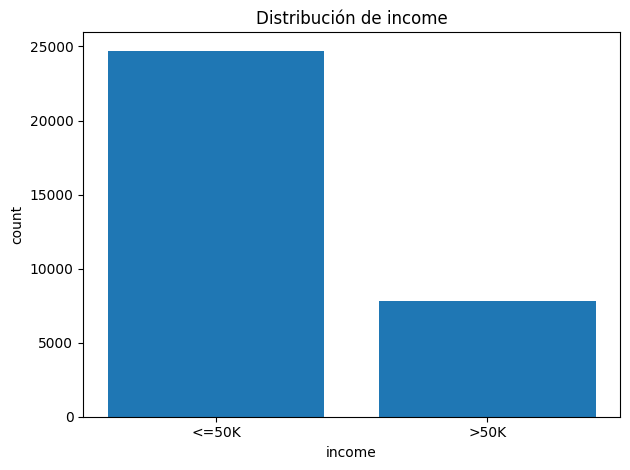

In [ ]:
counts = adult_df["income"].value_counts().reindex(["<=50K", ">50K"]).rename("count")
print(counts)


plt.figure(figsize=(6.4, 4.8))  # 640x480
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("income")
plt.ylabel("count")
plt.title("Distribución de income")
plt.tight_layout()
plt.show()


In [ ]:
# Asegura formato del campo income (por si viene con punto final)
adult_df["income"] = (
    adult_df["income"].astype(str).str.strip().str.replace(".", "", regex=False)
)


In [ ]:
map_income = {"<=50K": 0, ">50K": 1}
adult_df["income"] = adult_df["income"].map(map_income)

proportion = (
    adult_df["income"]
    .value_counts(normalize=True)
    .reindex([0, 1])
    .rename("proportion"))

print(proportion)


income
0    0.75919
1    0.24081
Name: proportion, dtype: float64


*Es un dataset desbalanceado, lo cual nos afectará para elegir la métrica y además deberíamos tratarlo de alguna forma como veremos en unidades posteriores*

### Ejercicio 5: Preparar variables categóricas (I)

Prepara las variables categóricas, salvo "education" y "native_country" (o su equivalente si no la has llamado así al connvertirla en binaria), convirtiéndolas con un one-hot encoding (usa el pd.get_dummies). NOTA: Recuerda que este es el dataset de train, por eso lo atacamos directamente.

In [ ]:
# Cuidado,solo debemos incluir las CATEGORICAS del dataset, y NO DEBEMOS INCLUIR EL TARGET


In [ ]:
cat_cols = adult_df.select_dtypes(include="object").columns.tolist() #capturamos cols

In [ ]:
excluir = {"education"}
excluir |= {c for c in cat_cols if re.search(r"native", c, flags=re.I)}

In [ ]:
dummies = pd.get_dummies(adult_df[cat_a_codificar], drop_first=True, dtype="uint8") #1 HOT ncoding

In [ ]:
otras_cols = [c for c in adult_df.columns if c not in cat_a_codificar]  
adult_train_ohe = pd.concat([adult_df[otras_cols].reset_index(drop=True),
                             dummies.reset_index(drop=True)], axis=1)

print("Forma original:", adult_df.shape, "→ con dummies:", adult_train_ohe.shape)
adult_train_ohe.head()


Columnas categóricas a codificar: ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex']
Columnas excluidas: ['education']
Forma original: (32561, 14) → con dummies: (32561, 46)


,age,education,education_num,capital_gain,capital_loss,hours_per_week,income,native_country_bin,workclass_Local Gov,workclass_Nan,...,relationship_Not In Family,relationship_Other Relative,relationship_Own Child,relationship_Unmarried,relationship_Wife,race_Asian Pac Islander,race_Black,race_Other,race_White,sex_Male
0,39,Bachelors,13,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,Bachelors,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,Hs Grad,9,0,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,53,11Th,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,Bachelors,13,0,0,40,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [27]:
adult_df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,native_country_bin
0,39,State Gov,Bachelors,13,Never Married,Adm Clerical,Not In Family,White,Male,2174,0,40,0,0
1,50,Self Emp Not Inc,Bachelors,13,Married Civ Spouse,Exec Managerial,Husband,White,Male,0,0,13,0,0
2,38,Private,Hs Grad,9,Divorced,Handlers Cleaners,Not In Family,White,Male,0,0,40,0,0
3,53,Private,11Th,7,Married Civ Spouse,Handlers Cleaners,Husband,Black,Male,0,0,40,0,0
4,28,Private,Bachelors,13,Married Civ Spouse,Prof Specialty,Wife,Black,Female,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc Acdm,12,Married Civ Spouse,Tech Support,Wife,White,Female,0,0,38,0,0
32557,40,Private,Hs Grad,9,Married Civ Spouse,Machine Op Inspct,Husband,White,Male,0,0,40,1,0
32558,58,Private,Hs Grad,9,Widowed,Adm Clerical,Unmarried,White,Female,0,0,40,0,0
32559,22,Private,Hs Grad,9,Never Married,Adm Clerical,Own Child,White,Male,0,0,20,0,0


### Ejercicio 6: Preparar variables categóricas (II)

Codifica la variable "education" usando un ordinal encoding, no uses la codificación por defecto, elígela tú y razónala o bien demuestra pillería y que has revisado el dataset.

In [ ]:
#de menor a mayor nivel educativo)
edu_order = [
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Prof-school",
    "Doctorate",]

# Normalizar texto y reconciliar posibles variantes 
#   
edu_alias = {
    "preschool": "Preschool",
    "1st-4th": "1st-4th",
    "5th-6th": "5th-6th",
    "7th-8th": "7th-8th",
    "9th": "9th",
    "10th": "10th",
    "11th": "11th",
    "12th": "12th",
    "hs-grad": "HS-grad", "hs grad": "HS-grad", "hs-grad.": "HS-grad",
    "some-college": "Some-college", "some college": "Some-college",
    "assoc-voc": "Assoc-voc", "assoc voc": "Assoc-voc",
    "assoc-acdm": "Assoc-acdm", "assoc acdm": "Assoc-acdm",
    "bachelors": "Bachelors",
    "masters": "Masters",
    "prof-school": "Prof-school", "prof school": "Prof-school",
    "doctorate": "Doctorate",
    "hs-grad".title(): "HS-grad",
    "some-college".title(): "Some-college",
    "assoc-voc".title(): "Assoc-voc",
    "assoc-acdm".title(): "Assoc-acdm",
    "prof-school".title(): "Prof-school",}


In [ ]:
def norm_edu(s):
s = str(s).strip()
s_simple = s.replace(".", "").replace("_", " ").replace("-", "-")
key = s_simple.lower()
return edu_alias.get(key, s)  # si no está en alias, devolvemos tal cual

adult_df["education_clean"] = adult_df["education"].apply(norm_edu)

dtype_edu = pd.api.types.CategoricalDtype(categories=edu_order, ordered=True)
adult_df["education_cat"] = adult_df["education_clean"].astype(dtype_edu)
adult_df["education_ord"] = adult_df["education_cat"].cat.codes

In [ ]:
print("Categorías encontradas y su código ordinal:")
display(
    adult_df[["education_clean", "education_ord"]]
    .drop_duplicates()
    .sort_values("education_ord"))


no_mapeados = adult_df.loc[adult_df["education_ord"] == -1, "education"].unique()
if len(no_mapeados):
    print("\nATENCIÓN: valores no mapeados en 'education':", no_mapeados)
else:
    print("\nTodos los valores de 'education' mapeados correctamente.")


Categorías encontradas y su código ordinal:


,education_clean,education_ord
15,7Th 8Th,-1
56,5Th 6Th,-1
160,1St 4Th,-1
224,Preschool,0
6,9th,4
77,10th,5
3,11th,6
415,12th,7
2,HS-grad,8
10,Some-college,9



ATENCIÓN: valores no mapeados en 'education': ['7Th 8Th' '5Th 6Th' '1St 4Th']


*Este es el orden teniendo en cuenta el grado de escolarización:o sea a lo bruto*

    Preschool
    1st-4th
    5th-6th
    7th-8th
    9th
    10th
    11th
    12th
    HS-grad (Graduado de Educación Secundaria)
    Some-college (Alguna educación universitaria, sin título)
    Assoc-voc (Título asociado - educación vocacional)
    Assoc-acdm (Título asociado - académico)
    Bachelors (Licenciatura o título universitario)
    Masters (Maestría)
    Prof-school (Escuela profesional, educación después de la licenciatura, como derecho o medicina)
    Doctorate (Doctorado)



In [ ]:
categories = [[
    "Preschool",
    "1st-4th",
    "5th-6th",
    "7th-8th",
    "9th",
    "10th",
    "11th",
    "12th",
    "HS-grad",
    "Some-college",
    "Assoc-voc",
    "Assoc-acdm",
    "Bachelors",
    "Masters",
    "Prof-school",
    "Doctorate"]]

In [ ]:
# usa un ordinal encoder

In [22]:
adult_df["education"].value_counts()

education
8.0     9840
9.0     6678
12.0    5044
13.0    1627
10.0    1307
6.0     1048
11.0    1008
5.0      820
3.0      557
14.0     542
4.0      455
7.0      377
15.0     375
2.0      288
1.0      151
0.0       45
Name: count, dtype: int64

*Otra posibilidad es directamente deshacernos de "education" y quedarnos con eduaction_num*

NOTA: En un ejercicio completo deberíamos decidir si escalar las variables numéricas continuas, si quieres puedes hacero tú como extra y comparar con el modelo que vamos a completar en este conjunto de ejercicios.

### Ejercicio 7: Modelo (I)

Instancia el modelo de regresión logística, con el hiperparámetro "max_iter" a 10000.

In [ ]:
# usa un solver 'newton-cholesky'

In [ ]:
logreg = LogisticRegression( max_iter=10000,solver='newton-cholesky')

### Ejercicio 8: Entrenamiento

Entrena modelo para el dataset de train tal como lo hemos preparado, creando antes el dataset sólo de features (X_train) y la serie con los valores del target (y_train). NOTA: Deshazte de "education_num" si has codificado tú a mano "education".

In [ ]:
X = adult_train_ohe.copy()

In [ ]:

# 1) Añadir la ordinal de education si aún no está
if "education_ord" in adult_df.columns and "education_ord" not in X.columns:
    X = X.join(adult_df["education_ord"])

# 2) Quitar columnas problemáticas de texto:
cols_a_quitar = []
if "education" in X.columns:
    cols_a_quitar.append("education")
# Si dejaste native_country sin codificar, quítala para poder entrenar:
if "native_country" in X.columns:
    cols_a_quitar.append("native_country")
# Quita también 'education_num' si vas a usar 'education_ord'
if "education_num" in X.columns:
    cols_a_quitar.append("education_num")

if cols_a_quitar:
    X = X.drop(columns=cols_a_quitar)

# 3) Verifica que no queden columnas object
obj_cols_restantes = X.select_dtypes(include="object").columns.tolist()
if obj_cols_restantes:
    # Si quedara alguna categórica textual suelta, dropeamos para entrenar ya
    # (alternativa: hacer get_dummies en estas columnas)
    X = X.drop(columns=obj_cols_restantes)
    print("AVISO: se han eliminado columnas no numéricas restantes:", obj_cols_restantes)

In [ ]:
y = adult_df["income"].astype(int) #targeteamos

print("X_train shape:", X.shape)
print("y_train balance:", y.value_counts(normalize=True).rename("prop"))

try:
    logreg = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    logreg.fit(X, y)
except ValueError:


print("Train accuracy:", logreg.score(X, y))


X_train shape: (32561, 45)
y_train balance: income
0    0.75919
1    0.24081
Name: prop, dtype: float64
Train accuracy: 1.0


In [ ]:
# entrena la regresión logística

LogisticRegression(max_iter=10000, solver='newton-cholesky')

### Ejercicio 9: Evaluación (I)

Previo a la evaluación necesitamos obtener y preparar el dataset de test. Carga el dataset a partir de "./data/adult.test". Luego aplícale las mismas operaciones que has realizado sobre el train. (NOTA; Puede que tengas que cambiar alguna cosa en la variable "income" para convertirla)

In [33]:
adult_test_df = pd.read_csv("./data/adult.test", header = None)
adult_test_df.columns = column_names
col_str = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for col in col_str:
    print(col)
    adult_test_df[col] = adult_test_df[col].str.strip()
adult_test_df.drop("fnlwgt", axis = 1, inplace = True)
son_raros = None
for i,col in enumerate(col_raros):
    subcondicion = adult_test_df[col] == "?"
    if i == 0:
        condicion = subcondicion
    else:
        condicion = condicion | subcondicion # Importante son las filas que cumplen tener uno de los posibles valores raros por eso el "or" de Series -> "|""

print(len(adult_test_df[condicion]))
adult_test_df = adult_test_df.loc[condicion == False].copy()
adult_test_df["native_country_bin"] = adult_test_df["native_country"].str.replace("United-States","1")
adult_test_df.loc[adult_test_df["native_country_bin"] != "1", "native_country_bin"] = "0"
adult_test_df["native_country_bin"] = adult_test_df["native_country_bin"].astype("int")
adult_test_df.drop("native_country", axis = 1, inplace = True)
col_str.remove("native_country")
adult_test_df["income"] = adult_test_df['income'].str.replace(">50K.","1").replace("<=50K","0").replace("<=50K.","0").astype(int)
adult_test_df.drop("education", axis = 1, inplace = True)
adult_test_df = pd.get_dummies(adult_test_df, columns = [col for col in col_str if col != "education" and col  != "income"], dtype= "int") 
X_test = adult_test_df.drop("income", axis = 1)
y_test = adult_test_df["income"]

FileNotFoundError: [Errno 2] No such file or directory: './data/adult.test'

### Ejercicio 10: Evaluación (II)

Obten la predicción para X_train y para X_test.

In [ ]:
pred_train = 
pred_test = 

### Ejercicio 11: Evaluación (III)

Muestra la matriz de confusión para los resultados de train, así como el clasification_report de sklearn

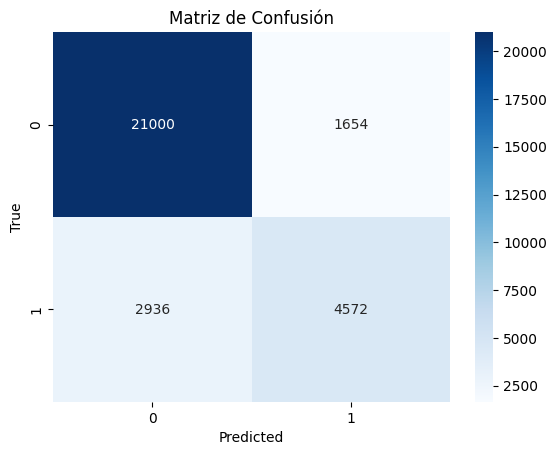

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22654
           1       0.73      0.61      0.67      7508

    accuracy                           0.85     30162
   macro avg       0.81      0.77      0.78     30162
weighted avg       0.84      0.85      0.84     30162



In [ ]:
conf_matrix = 



plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación


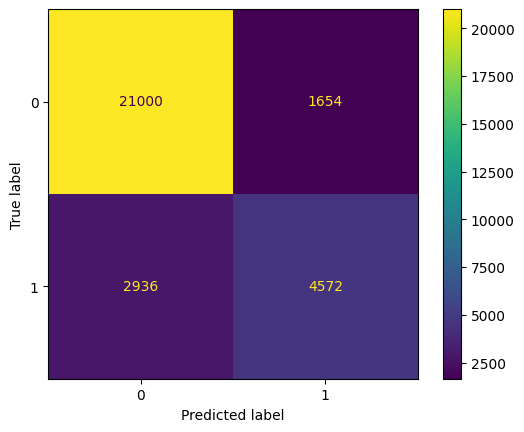

In [ ]:
# Empleando las capacidades nativas de Sklearn



### Ejercicio 12: Evaluación (IV)
Muestra la matriz de confusión y el classification report para los resultados del test. Comparála con los de train.

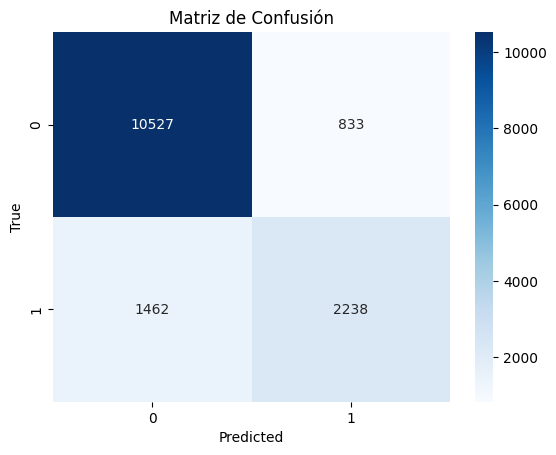

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11360
           1       0.73      0.60      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [ ]:
# Calcular la matriz de confusión
conf_matrix = 

# Visualizar la matriz de confusión

plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación


*El modelo, como era de esperar, detecta mejor la clase 0 (muy superior a la 1 en proporcion) pero muestra buenos números para la clase 1. Además la generalización es casi perfecta. Podriamos decir que tenemos un modelo muy bueno*

### Extra: 

1. Muestra la curva ROC de test.

2. Muestra los coeficientes y su importancia.

In [ ]:
# Curva ROC en test

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_proba = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

AUROC: 0.90


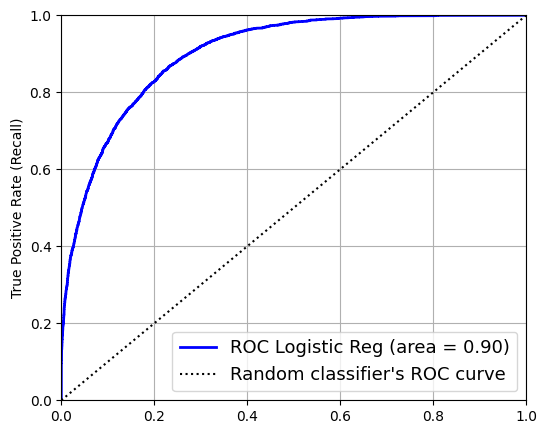

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Modelo (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Azar")
plt.xlabel("False Positive Rate (1 - Especificidad)")
plt.ylabel("True Positive Rate (Sensibilidad)")
plt.title("Curva ROC – Test")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Coeficientes e importancia


# 1) Extraer el modelo lineal (ajusta el nombre del paso si es distinto)
log_reg = pipe.named_steps["clf"]   # por ejemplo: "clf", "logreg", etc.

# 2) Obtener nombres de features
# Si trabajas con DataFrame directamente:
# feature_names = X_train.columns

# Si usas un ColumnTransformer dentro de "preprocess":
feature_names = pipe.named_steps["preprocess"].get_feature_names_out()

# 3) Coeficientes
coefs = log_reg.coef_[0]  # para binaria: una sola fila

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

# Top 20 características más importantes
coef_df.head(20)


*Como era de esperar el modelo presenta un magnífico AuROC = 0.9 y una figura ROC de las que no verás muchas*

In [33]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
age,0.026030
education_num,0.282198
capital_gain,0.000316
capital_loss,0.000639
hours_per_week,0.029583
native_country_bin,0.210056
workclass_Federal-gov,0.702637
workclass_Local-gov,0.012186
workclass_Private,0.213059
workclass_Self-emp-inc,0.380294


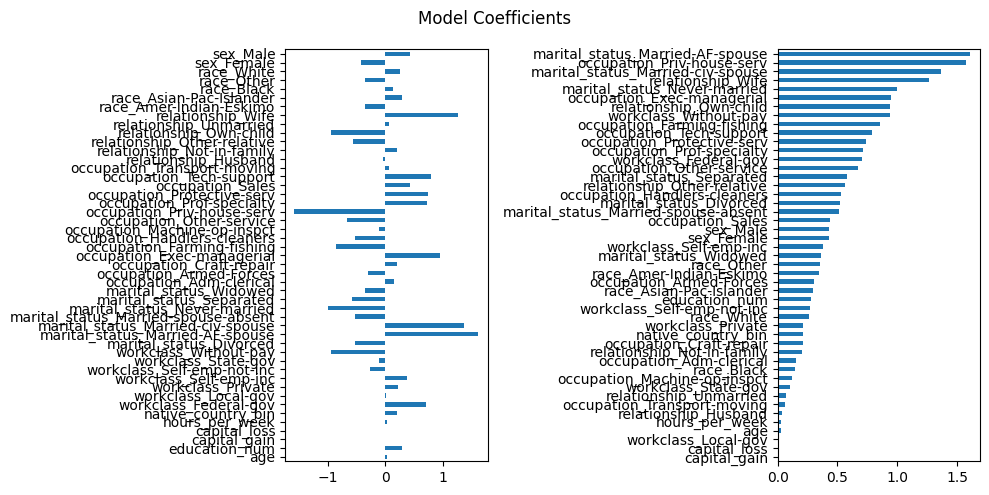

In [34]:
show_coefs(log_class)